### Step-1 Exploring and Preparing the Data

In [1]:
import pandas as pd
# Read the csv file
credit = pd.read_csv("./creditData.csv")
credit.head(4)

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2


In [2]:
credit.isnull().sum()

Creditability                        0
Account Balance                      0
Duration of Credit (month)           0
Payment Status of Previous Credit    0
Purpose                              0
Credit Amount                        0
Value Savings/Stocks                 0
Length of current employment         0
Instalment per cent                  0
Sex & Marital Status                 0
Guarantors                           0
Duration in Current address          0
Most valuable available asset        0
Age (years)                          0
Concurrent Credits                   0
Type of apartment                    0
No of Credits at this Bank           0
Occupation                           0
No of dependents                     0
Telephone                            0
Foreign Worker                       0
dtype: int64

#### Q1. What is your suggestion if you see any NA values?

1 . The easiest way is to ignore the tuples or rows with missing values this can only be done when the missing values is less than 2% of the data. We can do this only when we can afford to loose a bit of data. 
2 . The second way is to do the imputation , which is replacing the data with mean or median of the other variables. we can use libraries like mtcars to do this.
3 . The other way is to do the interpolation, This can be done only when we the data points have linear relationship.

#### Q2. Compute the percentage of both classes similar to what you did in lab 1 and see if the distribution of both classes preserved for both training and testing data

In [3]:
from sklearn.model_selection import train_test_split
y = credit['Creditability']
X = credit.drop(['Creditability'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
random_state=123)

print("Credit test")
y_test.value_counts()/250

Credit test


1    0.66
0    0.34
Name: Creditability, dtype: float64

In [4]:
print("Credit train")
y_train.value_counts()/750

Credit train


1    0.713333
0    0.286667
Name: Creditability, dtype: float64

#### Ans. From the prop tables above we can see that the distribution is uniform for test as well as train datasets

### Step 2: Training a Model on the Data

In [5]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb = gnb.fit(X_train, y_train)
y_pred = gnb.fit(X_train, y_train).predict(X_test)

In [6]:
# Evaluating the model performance and calculating accuracy

from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score

print(confusion_matrix(y_test, y_pred)) 
print("Accuracy Score is")
print(accuracy_score(y_test, y_pred)*100)

[[ 60  25]
 [ 34 131]]
Accuracy Score is
76.4


## PART-2 Improving Perfomance

### Step 1: Exploring and preparing the data

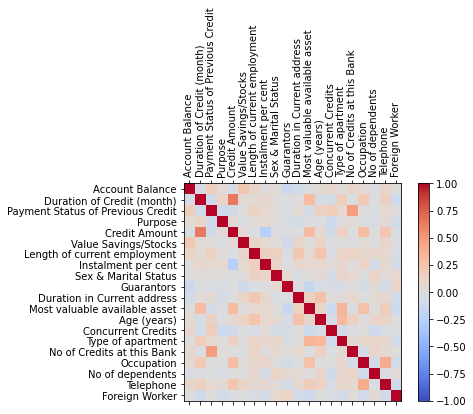

In [7]:
import matplotlib.pyplot as plt
import numpy as np

corr = X_train.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(X_train.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(X_train.columns)
ax.set_yticklabels(X_train.columns)
plt.show()

In [8]:
corr_matrix = X.corr().abs()
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),
k=1).astype(np.bool))
# Find index of feature columns with correlation greater than 0.60
to_drop = [column for column in upper.columns if any(upper[column] > 0.6)]
Xnew = X.drop(to_drop, axis=1)

In [9]:
# creating the model with new values

from sklearn.model_selection import train_test_split
y = credit['Creditability']
X = credit.drop(['Creditability'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(Xnew, y, test_size=0.25,
random_state=123)

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb = gnb.fit(X_train, y_train)
y_pred = gnb.fit(X_train, y_train).predict(X_test)

from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score

print(confusion_matrix(y_test, y_pred)) 
print("Accuracy Score is")
print(accuracy_score(y_test, y_pred)*100)


[[ 65  20]
 [ 37 128]]
Accuracy Score is
77.2


#### Q3. What is the accuracy this time? Be sure to include in your results report whether or not, after all this work, the performance of your Naïve Bayes Classifier was improved. 

The Accuracy here is 77.2 compared to the previous value of 76.4

## Part 3. Support Vector Machine

### Step 1: Collecting the Data

In [10]:
import pandas as pd
input_file = "./letterdata.csv"
letters = pd.read_csv(input_file)
letters.head(5)

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [11]:
from sklearn.model_selection import train_test_split
y = letters['letter']
X = letters.drop(['letter'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,
random_state=123)

print(X_train.shape)
print(y_train.shape)

(18000, 16)
(18000,)


In [12]:
from sklearn import svm
# Design the model
clf = svm.SVC(kernel='linear')
#clf = svm.LinearSVC(C=1)
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)
confusion_matrix(y_test, y_predict)

array([[97,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  1,  1,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  2,  0],
       [ 0, 60,  0,  2,  1,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  2,  2,  0,  0,  0,  0,  1,  0,  0],
       [ 0,  0, 62,  0,  1,  0,  1,  0,  0,  0,  2,  0,  0,  0,  1,  0,
         0,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0,  6,  0, 73,  0,  0,  0,  1,  0,  0,  0,  0,  0,  1,  1,  1,
         0,  1,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  2,  0, 62,  0,  4,  0,  0,  0,  0,  1,  0,  0,  0,  0,
         0,  0,  2,  2,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  0,  1, 60,  1,  0,  0,  0,  0,  0,  0,  1,  0,  4,
         0,  0,  1,  0,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  1,  2,  2,  0, 60,  1,  0,  0,  2,  2,  0,  0,  1,  1,
         0,  1,  4,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  2,  0,  4,  0,  2,  1, 45,  0,  0,  5,  0,  0,  0,  2,  0,
         1,  6,  0,  0,  1,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  4, 

In [13]:
print(accuracy_score(y_test, y_predict)*100)

86.15


#### Q4. We may be able to do better than this by changing the Kernels. Try Polynomial and RBF kernels to improve the result.

In [14]:
# Polynomial Kernal 

from sklearn import svm
# Design the model
clf = svm.SVC(kernel='poly')
#clf = svm.LinearSVC(C=1)
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)
confusion_matrix(y_test, y_predict)
print(accuracy_score(y_test, y_predict)*100)

95.25


In [15]:
# RBF Kernel

from sklearn import svm
# Design the model
clf = svm.SVC(kernel='rbf')
#clf = svm.LinearSVC(C=1)
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)
confusion_matrix(y_test, y_predict)
print(accuracy_score(y_test, y_predict)*100)

93.10000000000001


The accuracy has improved in Polynomial to 95.25 and to 93.1 in RBF

### Part 4 , News Popularity

####  PART - 1 NAIVE BAYES

In [27]:
# Applying Naive Bayes and SVM to News Popularity DataSet 

# Read the csv file
import pandas as pd
news = pd.read_csv("./NewsPopularity.csv")
news.head(4)

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731,12,219,0.663594,1.0,0.815385,4,2,1,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.5,-0.1875,0.0,0.1875,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731,9,255,0.604743,1.0,0.791946,3,1,1,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.0,0.0000,0.5,0.0000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731,9,211,0.575130,1.0,0.663866,3,1,1,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.0,0.0000,0.5,0.0000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731,9,531,0.503788,1.0,0.665635,9,0,1,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.0,0.0000,0.5,0.0000,1200


In [28]:
# Check for missing data
news.isnull().sum()

url                             0
timedelta                       0
n_tokens_title                  0
n_tokens_content                0
n_unique_tokens                 0
                               ..
title_subjectivity              0
title_sentiment_polarity        0
abs_title_subjectivity          0
abs_title_sentiment_polarity    0
shares                          0
Length: 61, dtype: int64

In [29]:
# split dataset to 70-30 training and testing resp.
from sklearn.model_selection import train_test_split

popular = news.shares >= 1400
unpopular = news.shares < 1400
news.loc[popular,'shares'] = 1
news.loc[unpopular,'shares'] = 0

y = news['shares']

X = news[["n_tokens_title", "n_tokens_content", "n_unique_tokens", "n_non_stop_words", "num_hrefs", "num_imgs", "num_videos", "average_token_length", "num_keywords", "kw_max_max", "global_sentiment_polarity", "avg_positive_polarity", "title_subjectivity", "title_sentiment_polarity", "abs_title_subjectivity", "abs_title_sentiment_polarity", "shares"]].drop(['shares'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.25,
random_state=123)

print(X_train.shape)
print(y_train.shape)


(29733, 16)
(29733,)


In [30]:
# Training a model
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb = gnb.fit(X_train, y_train)
y_pred = gnb.fit(X_train, y_train).predict(X_test)

In [31]:
# Evaluating the model performance and calculating accuracy
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score

print(confusion_matrix(y_test, y_pred)) 

print(accuracy_score(y_test, y_pred)*100)

[[4330  274]
 [4732  575]]
49.49046513974372


#### PART-2 NAIVE BAYES ( IMPROVING PERFORMANCE )

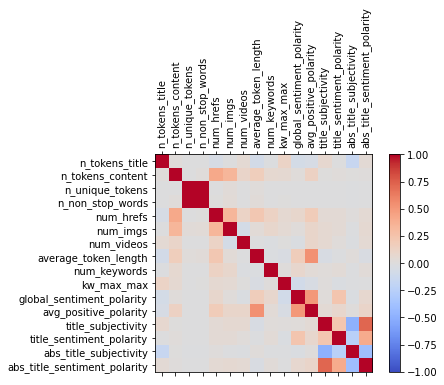

In [32]:
import matplotlib.pyplot as plt
import numpy as np

corr = X_train.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(X_train.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(X_train.columns)
ax.set_yticklabels(X_train.columns)
plt.show()

In [22]:
X = news[["n_tokens_title", "n_tokens_content", "n_unique_tokens", "n_non_stop_words", "num_hrefs", "num_imgs", "num_videos", "average_token_length", "num_keywords", "kw_max_max", "global_sentiment_polarity", "avg_positive_polarity", "title_subjectivity", "title_sentiment_polarity", "abs_title_subjectivity", "abs_title_sentiment_polarity", "shares"]].drop(['shares'],axis=1)

corr_matrix = X.corr().abs()
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),
k=1).astype(np.bool))
# Find index of feature columns with correlation greater than 0.60
to_drop = [column for column in upper.columns if any(upper[column] > 0.6)]
Xnew = X.drop(to_drop, axis=1)


In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Xnew, y, test_size=0.25,
random_state=123)

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb = gnb.fit(X_train, y_train)
y_pred = gnb.fit(X_train, y_train).predict(X_test)

from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score

print(confusion_matrix(y_test, y_pred)) 
print("Accuracy Score is")
print(accuracy_score(y_test, y_pred)*100)

[[3821  783]
 [4083 1224]]
Accuracy Score is
50.903037029563116


#### PART 3 . Support Vector Machine on News Popularity DataSet 

In [24]:
from sklearn import svm
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1,1)).fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


clf = svm.SVC(kernel='linear')
#clf = svm.LinearSVC(C=1)
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)
confusion_matrix(y_test, y_predict)
print(accuracy_score(y_test, y_predict)*100)

56.40197760064575


In [25]:
# Polynomial kernel 

from sklearn import svm
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score
# Design the model
clf = svm.SVC(kernel='poly')
#clf = svm.LinearSVC(C=1)
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)
confusion_matrix(y_test, y_predict)
print(accuracy_score(y_test, y_predict)*100)

57.431137120371304


In [26]:
# RBF kernel 
from sklearn import svm
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score

clf = svm.SVC(kernel='rbf')
#clf = svm.LinearSVC(C=1)
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)
confusion_matrix(y_test, y_predict)
print(accuracy_score(y_test, y_predict)*100)


57.22934113611139


#### Q5. Do you see any improvement compared to last three techniques? Please completely explain your results and analysis.

The accuracy is 49.49 for the model which was built using NaiveBayes technique. The accuracy has improved to 50.6 when we did the feature selection with a correlation value greater 0.6. Coming to the SVM the accuracy has improved to 56.4 , 57.4 , 57.22 with linear , poly , rbf kernels respectively. Though SVM took longer time to process , SVM has yielded high accuracy compared to Naive Bayes Classifier. 